# The Annulus Methods

## My Annulus Method

In [18]:
import numpy as np

import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

def punch_annulus(base, inner_radius, outer_radius, centre=False):
        if not centre:
            centre = (len(base[0])/2, len(base)/2)
        
        for y in range(len(base)):
            for x in range(len(base[y])):
                if inner_radius ** 2 < ((x-centre[0]) ** 2 + (y-centre[1]) ** 2) < outer_radius ** 2:
                    base[y][x] = 0
    
        return base

def punch_annulus_kernel(base, inner_radius, outer_radius, centre=False):
        base = base - 1

        base = punch_annulus(base, inner_radius, outer_radius, centre) + 1

        base = base / np.sum(base)
    
        return base

from collation import collator
from plotting import honours_plot as hplt
import matplotlib.pyplot as plt

collated_data = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


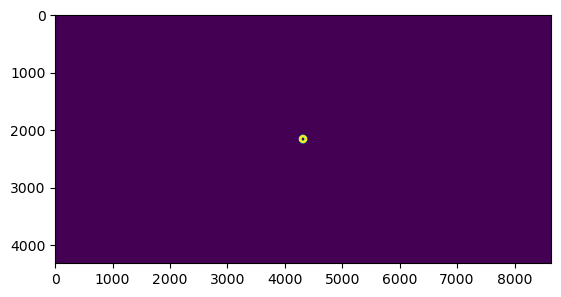

1.0


In [25]:
base = (collated_data["interpolation"]["interpolation"].data * 0)

dpp = len(base)/180
size_params = (1, np.pi)

base = punch_annulus_kernel(base, dpp*size_params[0], dpp*size_params[1])

plt.imshow(base)
plt.show()

print(np.sum(base))

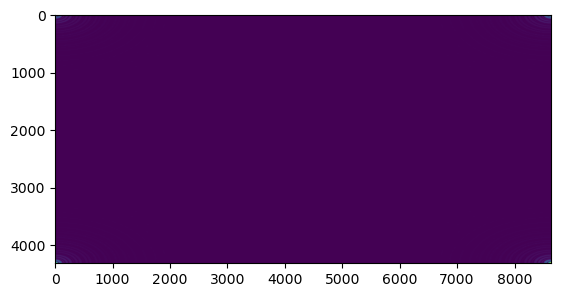

In [26]:
from foreground import foreground_remover as fr

sinc = fr.get_k_space(base)

plt.imshow(np.log(np.abs(sinc.real)+1))
plt.show()

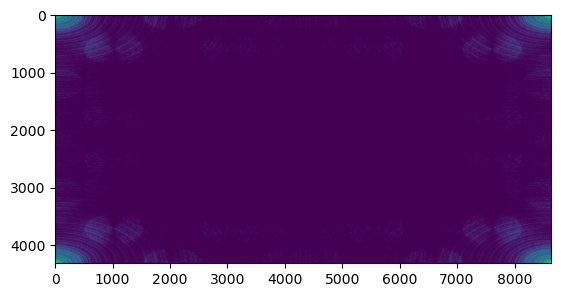

In [27]:
annulus_k_space = collated_data["interpolation"]["k-space"] * sinc

plt.imshow(np.log(np.abs(annulus_k_space.real)+1))
plt.show()

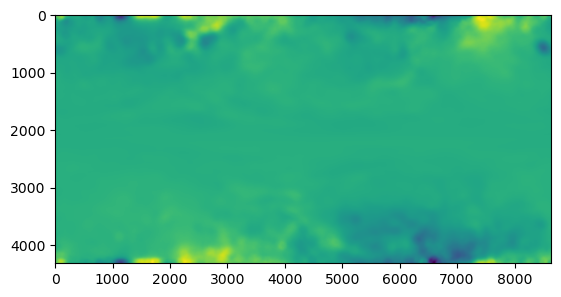

In [28]:
corrected_annulus = fr.get_corrected_image(annulus_k_space).real

plt.imshow(corrected_annulus)
plt.show()